In [6]:
library("dplyr")
library("ggplot2")
library("gridExtra")
library("latex2exp")

In [7]:
SEED <- 1771
N <- c(2, 29, 73)
MIN <- 10
MAX <- 14
SAMPLES <- 950

In [8]:
df <- data.frame(i = c(), value = c())

for (n in N) {
  set.seed(SEED)
  col <- c()
  for (i in 1:SAMPLES) {
    sample <- runif(n, min = MIN, max = MAX) %>%
      mean()
    df <- df %>%
      rbind(data.frame(i = n, value = sample))
  }
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


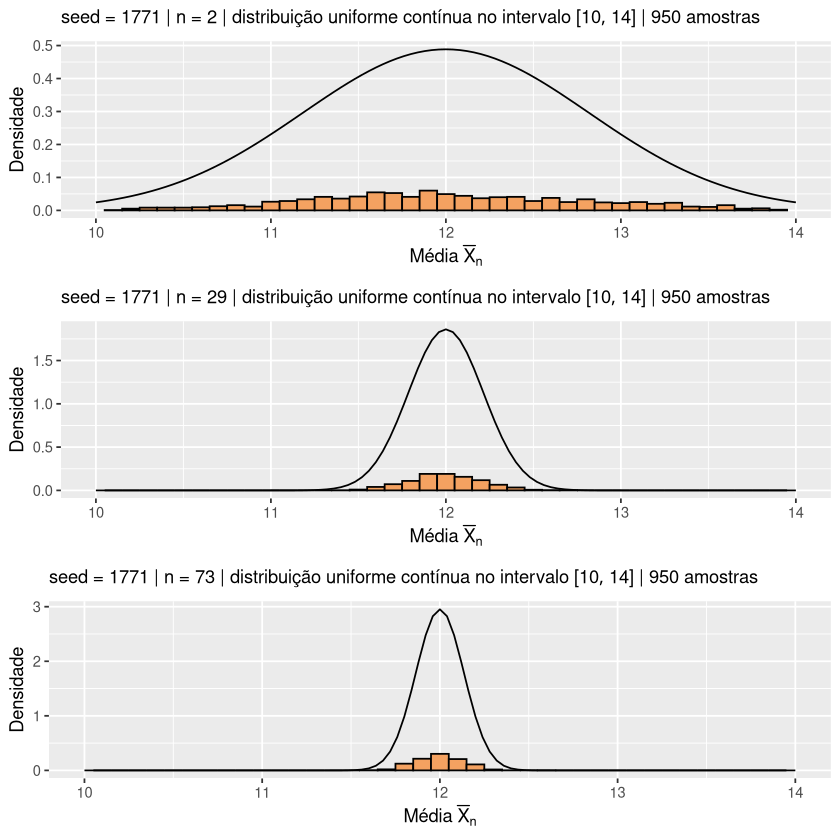

In [9]:
plots <- list()
for (n in N) {
  df_filtered <- df %>%
    filter(i == n)
  var <- ((1 / 12) * (MAX - MIN)^2) / n
  plot <- df_filtered %>%
    ggplot(aes(x = value)) +
      geom_histogram(aes(y = ..count../sum(..count..)), colour = "black", fill = "#f4a261",
        binwidth = 0.1) +
      stat_function(fun = dnorm, args = list(mean = mean(c(MIN, MAX)), sd = sqrt(var))) +
      xlim(c(MIN, MAX)) +
      labs(subtitle = TeX(sprintf(paste("seed = %d",
            "$n$ = %d",
            "distribuição uniforme contínua no intervalo $\\[%d, %d\\]$",
            "%d amostras", sep = " | "), SEED, n, MIN, MAX, SAMPLES))) +
      xlab(TeX("Média $\\bar{X}_n$")) +
      ylab("Densidade")

  plots <- plots %>% append(list(plot))
}

grid <- do.call(grid.arrange, plots)

In [10]:
ggsave("output.svg", plot = grid, width = 20, height = 14.5, units = "cm")

Através dos três histogramas obtidos, podemos concluir que para maior
quantidade de valores na distribuição uniforme (isto é, $n$),
o valor da média obtido empiricamente se aproxima do valor esperado (neste caso, 12).  
Por outras palavras, quanto maior o valor de n, menor será o desvio padrão da distribuição
da média $\bar{X}n$.